# Image classification for images arranged in individual folders

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [54]:
train_path = 'dataset/dataset/train/'
valid_path = 'dataset/dataset/test/'

In [55]:
image_files = glob(train_path + '/*/*.jp*g')  # Captures filenames in train folder
valid_image_files = glob(valid_path + '/*/*.jp*g') # Captures filenames in test folder

# useful for getting number of classes
folders = glob(train_path + '/*') # This helps with # of class in the images

print(len(image_files)) # total number of images in train folder
print(len(folders)) # Class of images

3030
2


In [56]:
image_files[0:10]

['dataset/dataset/train\\without_mask\\0.jpg',
 'dataset/dataset/train\\without_mask\\0_0_aidai_0014.jpg',
 'dataset/dataset/train\\without_mask\\0_0_aidai_0029.jpg',
 'dataset/dataset/train\\without_mask\\0_0_aidai_0043.jpg',
 'dataset/dataset/train\\without_mask\\0_0_aidai_0074.jpg',
 'dataset/dataset/train\\without_mask\\0_0_aidai_0084.jpg',
 'dataset/dataset/train\\without_mask\\0_0_aidai_0136.jpg',
 'dataset/dataset/train\\without_mask\\0_0_anhu_0004.jpg',
 'dataset/dataset/train\\without_mask\\0_0_anhu_0020.jpg',
 'dataset/dataset/train\\without_mask\\0_0_anhu_0025.jpg']

In [57]:
folders[0], folders

('dataset/dataset/train\\without_mask',
 ['dataset/dataset/train\\without_mask', 'dataset/dataset/train\\with_mask'])

In [58]:
image_files[0]

'dataset/dataset/train\\without_mask\\0.jpg'

# Keras method of reading image

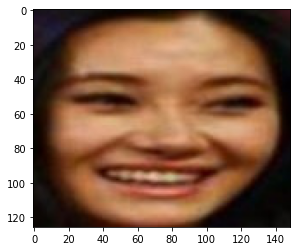

In [42]:
from keras.preprocessing import image

# look at an image for fun
img=image.load_img(np.random.choice(image_files))
img=image.img_to_array(img).astype('uint8')
#plt.imshow(image.img_to_array(image.load_img(np.random.choice(image_files))).astype('uint8'))
plt.imshow(img)
plt.show()

# Numpy method of reading image

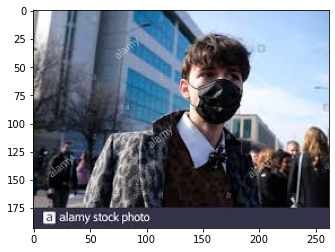

In [79]:
from matplotlib import image
image = image.imread(np.random.choice(image_files))
plt.imshow(image)

# Preprocessing 

In [43]:
from keras.preprocessing.image import ImageDataGenerator

# Normalizing train data and adding augumentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [21]:
# Normalizing test data and No augumentation

test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
training_set = train_datagen.flow_from_directory('dataset/dataset/train/',
                                                 target_size=(100, 100),
                                                 batch_size= 32,
                                                 class_mode='categorical')

Found 3064 images belonging to 2 classes.


In [23]:
test_set = test_datagen.flow_from_directory('dataset/dataset/test/',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 760 images belonging to 2 classes.


# Model creating

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [45]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 2 neuron to predict the categorical classifcation
classifier.add(Dense(units = len(folders), activation = 'softmax'))

In [46]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

In [33]:
classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
history = classifier.fit(training_set, epochs= 3,validation_data=test_set) 

# Already bath set is set to 32. 3064/32 = 96 batches

Epoch 1/3
96/96 [==============================] - 44s 454ms/step - loss: 0.4685 - accuracy: 0.7660 - val_loss: 0.3393 - val_accuracy: 0.8842
Epoch 2/3
96/96 [==============================] - 36s 379ms/step - loss: 0.2083 - accuracy: 0.9209 - val_loss: 0.3276 - val_accuracy: 0.8961
Epoch 3/3
96/96 [==============================] - 38s 393ms/step - loss: 0.1709 - accuracy: 0.9382 - val_loss: 0.2532 - val_accuracy: 0.9224


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


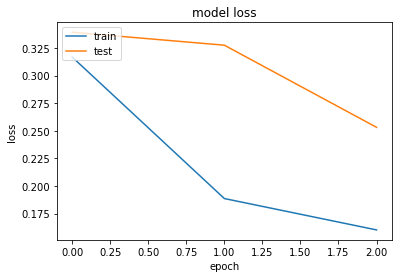

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


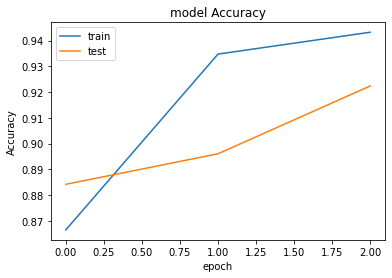

In [52]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# predicting using test images

In [38]:
import cv2
import numpy as np
test_image = cv2.imread('tests/test6.jpg')
# Resize the image to 100 X 100 shape to be compatible with the model
test_image = cv2.resize(test_image,(100,100))

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))


#Predict the result of the test image
result = classifier.predict(test_image)

# Check the indices Image Data Generator has allotted to each folder
classes_dict = training_set.class_indices
print(classes_dict)

# Creating a list of classes in test set for showing the result as the folder name
prediction_class = []
for class_name,index in classes_dict.items():
  prediction_class.append(class_name)
  
print(result[0])

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print(prediction_class[predicted_index])

(100, 100, 3)
After expand_dims: (1, 100, 100, 3)
{'with_mask': 0, 'without_mask': 1}
[0.9989172  0.00108278]
with_mask
